# Intro to Pandas


[Pandas](https://pandas.pydata.org/docs/getting_started/index.html) DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

![pandas dataframe](./assets/py-pandas.png)

## Installation

In [ ]:
!pip install pandas

### Setting UP AWS access

In [2]:
!pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import os
%load_ext dotenv
%dotenv
for env in os.environ:
    print(env)

PATH
LANG
JUPYTERHUB_API_TOKEN
JPY_API_TOKEN
JUPYTERHUB_CLIENT_ID
JUPYTERHUB_HOST
JUPYTERHUB_OAUTH_CALLBACK_URL
JUPYTERHUB_OAUTH_SCOPES
JUPYTERHUB_OAUTH_ACCESS_SCOPES
JUPYTERHUB_OAUTH_CLIENT_ALLOWED_SCOPES
JUPYTERHUB_USER
JUPYTERHUB_SERVER_NAME
JUPYTERHUB_API_URL
JUPYTERHUB_ACTIVITY_URL
JUPYTERHUB_BASE_URL
JUPYTERHUB_SERVICE_PREFIX
JUPYTERHUB_SERVICE_URL
JUPYTERHUB_DEFAULT_URL
USER
HOME
SHELL
GIT_PYTHON_REFRESH
PYDEVD_USE_FRAME_EVAL
JPY_SESSION_NAME
JPY_PARENT_PID
TERM
CLICOLOR
FORCE_COLOR
CLICOLOR_FORCE
PAGER
GIT_PAGER
MPLBACKEND
TENANT
TENANT_ID
STAGE
AWS_REGION
AWS_DEFAULT_REGION
AWS_ROLE_ARN
AWS_WEB_IDENTITY_TOKEN_FILE
AWS_STS_REGIONAL_ENDPOINTS
DATA_LAKE
DATA_LAKE_ROOT_PATH
DATA_LAKE_TYPE
DATA_LAKE_REGION
DATA_WAREHOUSE_TYPE
MLFLOW_TRACKING_URI
MLFLOW_TRACKING_TOKEN
SAGEMAKER_ROLE
SYSTEM_ROLE
USER_ROLE
API_KEY
REDSHIFT_USERNAME
REDSHIFT_PASSWORD
REDSHIFT_ROLE
REDSHIFT_IAM_ROLE
REDSHIFT_PORT
REDSHIFT_SCHEMA
REDSHIFT_HOST
REDSHIFT_DATABASE


## Major Features for Dataframe
- Almost all functionalities for `R`
- Drop in functions for major SQL (and more) functionalities
- Use Excel? You won't miss it (majorly 😁)


<b> Let's Play with actual data<b>.
    
We are going to use [Electronic Products and Pricing Data summary](https://data.world/datafiniti/electronic-products-and-pricing-data/workspace/project-summary)

In [4]:
import io
import boto3
import pandas as pd

### Read from S3

In [5]:
S3_BUCKET = os.environ.get("DATA_LAKE")
S3_ROOT_PATH = os.environ.get("DATA_LAKE_ROOT_PATH") + "datascience/ktbyazhar/"

s3_client = boto3.client("s3")

In [6]:
data = s3_client.get_object(
    Bucket=S3_BUCKET,
    Key=f"{S3_ROOT_PATH}DatafinitiElectronicsProductsPricingData.csv")

#### Create Data frame from S3 payload

In [7]:
df = pd.read_csv(io.BytesIO(data['Body'].read()))

In [8]:
df

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,AVpfUsrxLJeJML437Ezd,79.99,79.99,Yes,New,USD,2017-10-10T08:00:00Z,False,Bestbuy.com,NaN,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN
7245,AVpfUsrxLJeJML437Ezd,68.75,68.75,In Stock,New,USD,2018-06-01T12:00:00Z,False,bhphotovideo.com,Free Expedited Shipping for most orders over $49,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN
7246,AVpfUsrxLJeJML437Ezd,70.99,70.99,Yes,New,USD,2017-05-18T05:00:00Z,False,Bestbuy.com,NaN,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN
7247,AVpfUsrxLJeJML437Ezd,71.99,71.99,Yes,New,USD,2017-08-28T11:00:00Z,False,Bestbuy.com,NaN,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN


#### Let's plot our data frame

In [ ]:
!pip install matplotlib

In [10]:
import matplotlib.pyplot as plt

<Axes: >

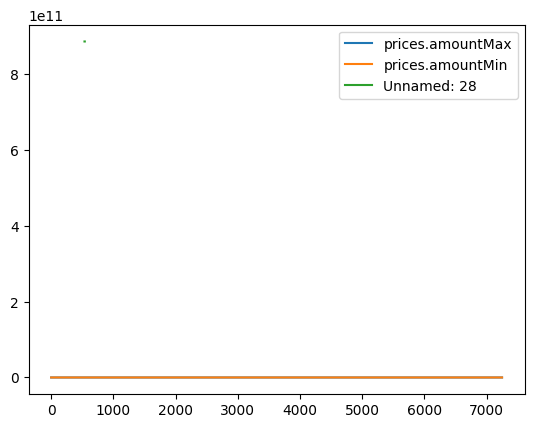

In [11]:
df.plot()

<Axes: ylabel='Frequency'>

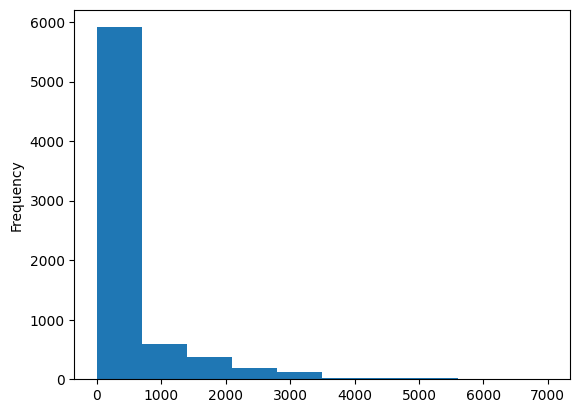

In [12]:
df["prices.amountMax"].plot(kind="hist")

<Axes: >

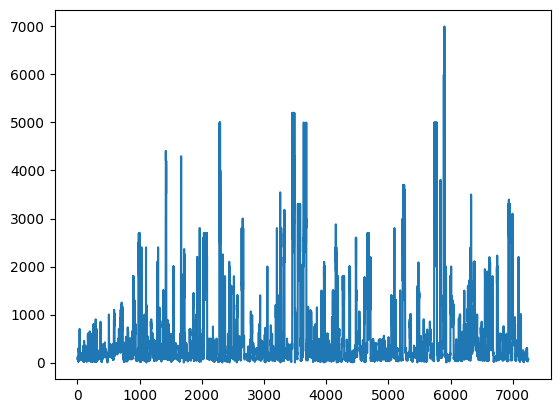

In [13]:
df["prices.amountMax"].plot()

### Basics 

In [14]:
# Head
df.head(5)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [15]:
# Describe
df.describe()

,prices.amountMax,prices.amountMin,Unnamed: 28
count,7249.000000,7249.000000,6.000000e+00
mean,495.530610,463.963005,8.850000e+11
std,763.599387,680.504507,0.000000e+00
min,1.000000,1.000000,8.850000e+11
25%,79.990000,79.950000,8.850000e+11
50%,198.990000,189.990000,8.850000e+11
75%,494.990000,479.990000,8.850000e+11
max,6999.990000,5999.990000,8.850000e+11


In [16]:
# memory_usage()
df.memory_usage()

Index                    132
id                     57992
prices.amountMax       57992
prices.amountMin       57992
prices.availability    57992
prices.condition       57992
prices.currency        57992
prices.dateSeen        57992
prices.isSale           7249
prices.merchant        57992
prices.shipping        57992
prices.sourceURLs      57992
asins                  57992
brand                  57992
categories             57992
dateAdded              57992
dateUpdated            57992
ean                    57992
imageURLs              57992
keys                   57992
manufacturer           57992
manufacturerNumber     57992
name                   57992
primaryCategories      57992
sourceURLs             57992
upc                    57992
weight                 57992
Unnamed: 26            57992
Unnamed: 27            57992
Unnamed: 28            57992
Unnamed: 29            57992
Unnamed: 30            57992
dtype: int64

In [17]:
# drop_duplicates()
df.drop_duplicates()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,AVpfUsrxLJeJML437Ezd,79.99,79.99,Yes,New,USD,2017-10-10T08:00:00Z,False,Bestbuy.com,NaN,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN
7245,AVpfUsrxLJeJML437Ezd,68.75,68.75,In Stock,New,USD,2018-06-01T12:00:00Z,False,bhphotovideo.com,Free Expedited Shipping for most orders over $49,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN
7246,AVpfUsrxLJeJML437Ezd,70.99,70.99,Yes,New,USD,2017-05-18T05:00:00Z,False,Bestbuy.com,NaN,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN
7247,AVpfUsrxLJeJML437Ezd,71.99,71.99,Yes,New,USD,2017-08-28T11:00:00Z,False,Bestbuy.com,NaN,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN


In [23]:
### Write Back to S3
df.to_csv(f"s3://{S3_BUCKET}/{S3_ROOT_PATH}DatafinitiElectronicsProductsPricingData_new.csv", index=False)

In [ ]:
!pip install fsspec pyarrow s3fs

In [24]:
df.to_parquet(f"s3://{S3_BUCKET}/{S3_ROOT_PATH}DatafinitiElectronicsProductsPricingData.parquet", index=False)